# **Clustering Project to determine Gait Phases**

## **Importing data into colab**


In [29]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
all_data_filepaths = glob('C:\\Users\\Armaa\\clusteringprojectPB\\datasets\\gait-phase-dataset\\data\\*.csv')
data_filepaths = [i for i in all_data_filepaths if not 'oversteps' in i] #Something is wrong with the Oversteps files
G1 = [i for i in data_filepaths if '22' in i]
df = pandas.read_csv(data_filepaths[0])

In [7]:
df.values

array([[ 28.7141  ,  29.257519,  -5.64032 ,  53.251572,  81.108917,
        464.529297],
       [ 28.815765,  29.543634,  -5.483627,  52.955372,  81.274582,
        464.7854  ],
       [ 28.874094,  29.828062,  -5.307098,  52.612923,  81.407852,
        465.08548 ],
       ...,
       [ 38.988789, -34.652363,  -6.531121,  17.077238, 238.879532,
        296.92865 ],
       [ 38.893517, -34.602802,  -6.405121,  17.361294, 236.674362,
        297.592682],
       [ 38.794609, -34.548412,  -6.271091,  17.663605, 234.326599,
        298.300873]])

In [8]:
def load_dfs(filepaths:list):
  df_dict = {}
  for file in filepaths:
    df_dict[file] = pandas.read_csv(file)
  return df_dict

In [9]:
def separate_subjects(patient_ID:str, df_dict: dict) -> dict: #GPXX_
  patient_dict = {}
  for file in df_dict:
    if patient_ID in file:
      patient_dict[file] = df_dict[file]

  return patient_dict

In [10]:
all_dfs = load_dfs(data_filepaths)
subject_1 = separate_subjects('GP1_', all_dfs)

In [15]:
test_plot_df = subject_1['C:\\Users\\Armaa\\clusteringprojectPB\\datasets\\gait-phase-dataset\\data\\GP1_1.1_marker.csv']
test_plot_df = test_plot_df['L_FCC_x']

In [16]:
test_plot_df.keys()

RangeIndex(start=0, stop=12000, step=1)

(0.0, 1000.0)

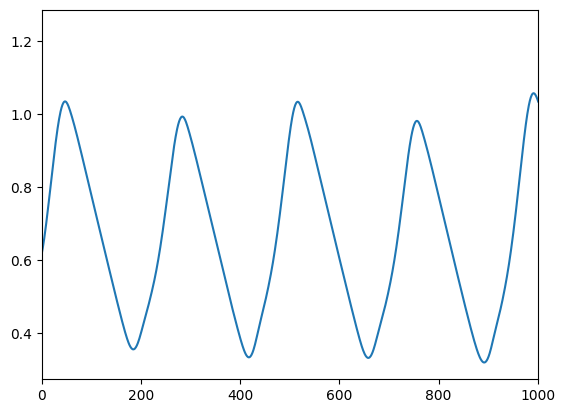

In [17]:
plt.plot(test_plot_df)
plt.xlim((0,1000))

In [18]:
test_fitting_df = subject_1['C:\\Users\\Armaa\\clusteringprojectPB\\datasets\\gait-phase-dataset\\data\\GP1_1.1_marker.csv']
X = test_fitting_df.values
Y = test_fitting_df['L_FCC_x']

In [19]:
X.shape

(12000, 24)

In [21]:
predictions = km.predict(X)

In [22]:
predictions.shape

(12000,)

In [38]:
predictions = pandas.Series(predictions, name="Predictions")
predictions = pd.concat([predictions,Y], axis=1)

ValueError: Data must be 1-dimensional, got ndarray of shape (12000, 2) instead

Text(0, 0.5, 'L_FCC_x value')

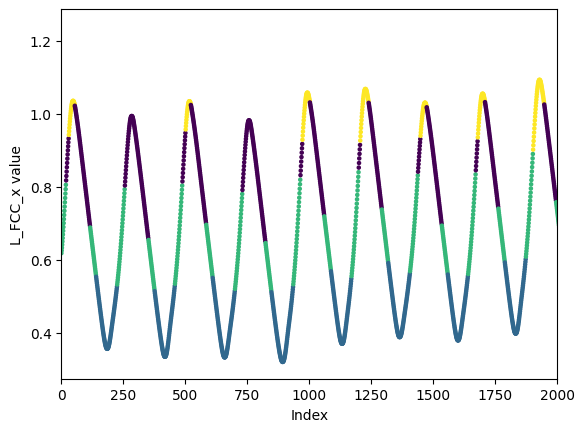

In [50]:
plt.scatter(predictions.index, predictions['L_FCC_x'], s=5, c=predictions['Predictions'])
plt.xlim(0,2000)
plt.xlabel("Index")
plt.ylabel("L_FCC_x value")

In [51]:
test_fitting_df.keys

<bound method NDFrame.keys of         L_FCC_x   L_FM1_x   L_FM2_x   L_FM5_x   R_FCC_x   R_FM1_x   R_FM2_x  \
0      0.617666  0.774482  0.776633  0.741281  0.669856  0.883906  0.884074   
1      0.624865  0.784464  0.786690  0.751875  0.665714  0.879707  0.879830   
2      0.632625  0.795132  0.797440  0.763204  0.661288  0.875224  0.875299   
3      0.640924  0.806430  0.808826  0.775207  0.656603  0.870485  0.870506   
4      0.649728  0.818287  0.820776  0.787812  0.651688  0.865519  0.865484   
...         ...       ...       ...       ...       ...       ...       ...   
11995  0.532404  0.728268  0.735900  0.715489  1.166112  1.367590  1.364574   
11996  0.529869  0.725241  0.732903  0.712382  1.164379  1.366024  1.363072   
11997  0.527676  0.722592  0.730271  0.709660  1.162708  1.364539  1.361640   
11998  0.525784  0.720281  0.727962  0.707284  1.161125  1.363150  1.360295   
11999  0.524126  0.718231  0.725904  0.705174  1.159615  1.361840  1.359022   

        R_FM5_x   L_F

Text(0, 0.5, 'L_FCC_z data')

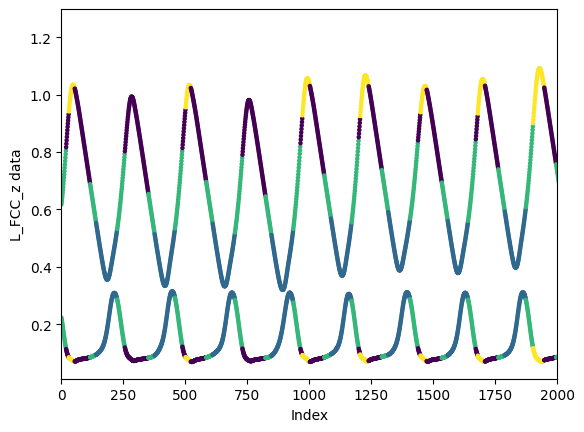

In [64]:
Y2 = test_fitting_df['L_FCC_z']
#pd.concat()
plt.scatter(predictions.index, Y2, c=predictions['Predictions'], s=5)
plt.scatter(predictions.index, predictions['L_FCC_x'], s=5, c=predictions['Predictions'])
plt.xlim(0,2000)
plt.xlabel("Index")
plt.ylabel("L_FCC_z data")





